[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aoguedao/math685_numerical_analysis/blob/main/assigments/hwk04.ipynb)

# MATH685 - Homework #04

_Alonso Ogueda_

In [197]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

## Exercise 4

In [198]:
a, b, c, d = 1, 0.5, 0.75, 0.25
h = 0.005
N = 1500
x, y = 2, 2
fx = lambda x, y: a * x - b * x * y
fy = lambda x, y: -c * y + d * x * y

In [ ]:
x_array = [x]
y_array = [y]
for i in range(N):
    xi = x + h * fx(x, y)
    yi = y + h * fy(x, y)
    x_array.append(xi)
    y_array.append(yi)
    x = xi
    y = yi

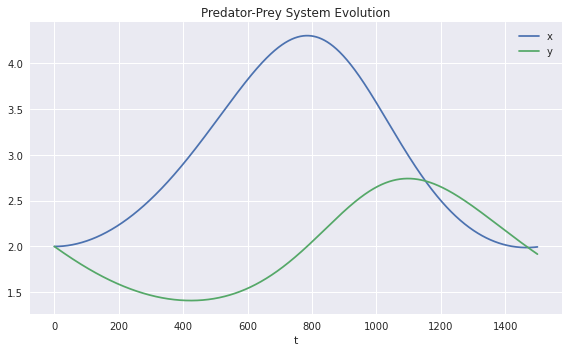

In [200]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(range(N + 1), x_array, label="x")
ax.plot(range(N + 1), y_array, label="y")
ax.legend()
ax.set_title("Predator-Prey System Evolution")
ax.set_xlabel("t")
fig.tight_layout()
plt.savefig("images/hwk04/exercise04b.png", dpi=300)
fig.show()

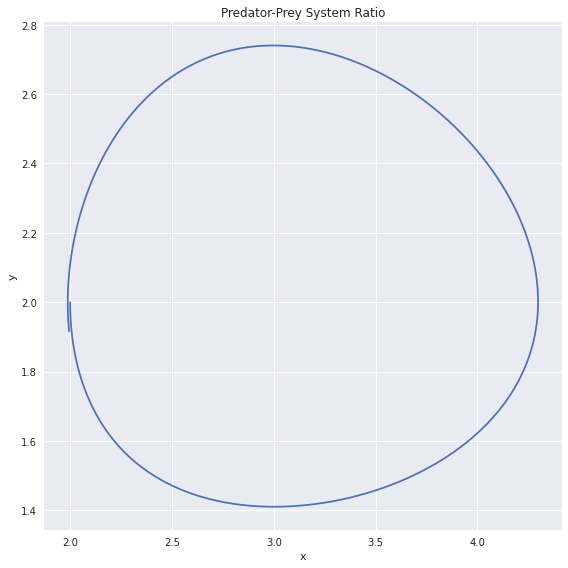

In [201]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_array, y_array)
ax.set_title("Predator-Prey System Ratio")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.tight_layout()
plt.savefig("images/hwk04/exercise04c.png", dpi=300)
fig.show()

## Exercise 5

### (a)

In [202]:
exact_solution = lambda x: x ** 3 / 8
h = 0.5
a, b = 2, 4
N = int((b - a) / h)
fy = lambda x, y, z: z 
fz = lambda x, y, z: 6 * y / (x ** 2)

In [ ]:
def q5_shooting_euler(x, y, z):
    x_array = [x]
    y_array = [y]
    z_array = [z]
    for _ in range(N):
        xi = x + h
        yi = y + h * fy(x, y, z)
        zi = z + h * fz(x, y, z)
        x = xi
        y = yi
        z = zi
        x_array.append(x)
        y_array.append(y)
        z_array.append(z)
    return x_array, y_array, z_array


In [204]:
x1_array, y1_array, z1_array = q5_shooting_euler(x=2, y=1, z=0)
x2_array, y2_array, z2_array = q5_shooting_euler(x=2, y=1, z=3)

In [205]:
print(y1_array[-1])
print(y2_array[-1])

2.8341666666666665
10.054166666666667


In [206]:
def z_interpolation(z1, z2, y1, y2, y):
    slope = (z2 - z1) / (y2 - y1)
    return slope * (y - y1) + z1

In [207]:
z0 = z_interpolation(
    z1=z1_array[0],
    z2=z2_array[0],
    y1=y1_array[-1],
    y2=y2_array[-1],
    y=8
)
x_array, y_array, z_array = q5_shooting_euler(x=2, y=1, z=z0)
print( y_array[-1])

8.0


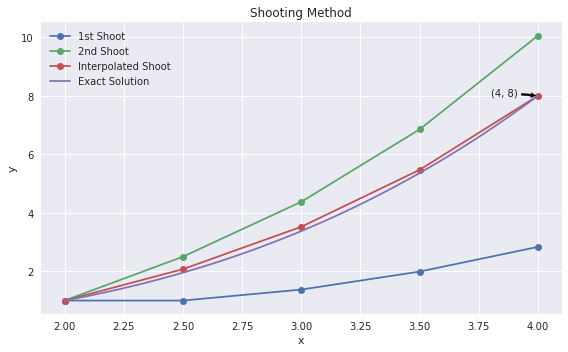

In [208]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x1_array, y1_array, marker='o', label="1st Shoot")
ax.plot(x2_array, y2_array, marker='o', label="2nd Shoot")
ax.plot(x_array, y_array, marker='o', label="Interpolated Shoot")
ax.plot(
    np.linspace(2, 4, 100),
    exact_solution(np.linspace(2, 4, 100)),
    label="Exact Solution"
)
ax.annotate(
    "(4, 8)",
    xy=(4, 8),
    xytext=(3.8, 8),
    arrowprops=dict(
        arrowstyle="simple",
        facecolor='black',
        connectionstyle="arc3"
    ),
)
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Shooting Method")
fig.tight_layout()
plt.savefig("images/hwk04/exercise05a.png", dpi=300)
fig.show()

### (b)

In [209]:
x0, xN = 2, 4
y0, yN = 1, 8
N = 5
h = (xN - x0) / ( N - 1)

In [210]:
x_array = np.linspace(x0, xN, N)
aux = [-0.5] * (N - 3)
A = np.diag(1 + 3 * h ** 2 / (x_array[1:-1] ** 2) ) + np.diag(aux, k=1) + np.diag(aux, k=-1)
f = np.array([0.5 * y0, 0, 0.5 * yN])
y = np.linalg.solve(A, f)
y_array = np.concatenate([[y0], y, [yN]])

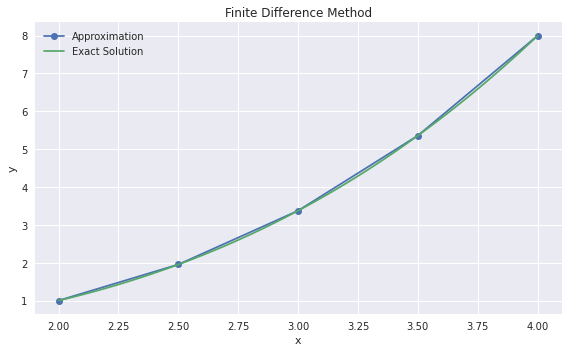

In [211]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x_array, y_array, marker='o', label="Approximation")
ax.plot(
    np.linspace(2, 4, 100),
    exact_solution(np.linspace(2, 4, 100)),
    label="Exact Solution"
)
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Finite Difference Method")
fig.tight_layout()
plt.savefig("images/hwk04/exercise05b.png", dpi=300)
fig.show()